Autores:
* Andrés Felipe García Viña                              A01800027
* Santiago Castro Benavides 			A01799544
* Rodrigo Lira Del Ángel 			A01799277
* Diego Jesús de Lara de la Cruz		A01799544


En el presente notebook se presenta la solucion al clasificador de spam utilizando el algoritmo de Naive Bayes. Este algoritmo es un clasificador probabilístico que se basa en el teorema de Bayes, el cual establece que la probabilidad de que ocurra un evento A dado que ha ocurrido un evento B es igual a la probabilidad de que ocurra el evento B dado que ha ocurrido el evento A multiplicado por la probabilidad de que ocurra el evento A y dividido por la probabilidad de que ocurra el evento B.

Se hara uso de las librerias `nltk` para el procesamiento de lenguaje natural, y `scikitlearn` para la implementación del modelo de clasificación. `MultinominalNB` del módulo `naive_bayes` de `scikitlearn` para entrenar el modelo de clasificación Naive-Bayes multinomial.

# Importación de librerías

In [ ]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Importación de datos y preprocesamiento

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5169, 2)

Eliminamos valores nulos y duplicados

Hacemos uso de la libreria `nltk` y `string` para el preprocesamiento de los datos. En este caso, se eliminan las stopwords, se tokenizan las palabras y se realiza el proceso de lematización. <br>
_Entendemos lematizacion a la tecnica de reducir variantes morfologicas de la forma de una palabra a raices comunes o lexemas_

In [ ]:
def process_text(text: str) -> str:
    """Esta función recibe un texto y devuelve un string limpio"""
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(clean_words)

Para hacer uso de la funcion creada `process_text` se debe instalar la sublibreria de `nltk stopwords`. las Stopwords son palabtas comunes como  "the", "a", "and", "in" lo que se busca es ignorar todas estas palabras en los corres a analizar. <br>
imagen referencia de StopWords <br>
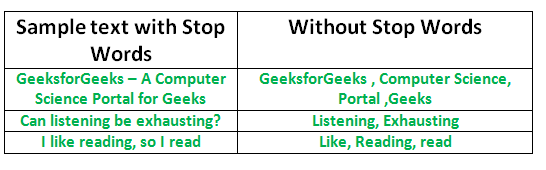
<br>
Para ello, se debe ejecutar el siguiente código:

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Felipe
[nltk_data]     Garcia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['processed_text'] = df['v2'].apply(process_text)

Teniendo en cuenta el estado actual de los datos y el preprocesamiento realizado hasta el momento, procedemos a tokenizar las palabras y a realizar el proceso de lematización. <br>
_Entendemos lematizacion a la tecnica de reducir variantes morfologicas de la forma de una palabra a raices comunes o lexemas_

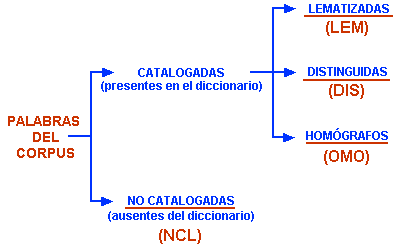

In [ ]:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 1))
bank_of_words = vectorizer.fit_transform(df['processed_text'])


# Clasificador

Teniendo nuestra transformacion de los datos, procedemos a dividir el dataset en un conjunto de entrenamiento y un conjunto de prueba. Para ello, se hace uso de la función `train_test_split` de la librería `scikitlearn`. Se divide el conjunto de datos en un 80% para entrenamiento y un 20% para prueba.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(bank_of_words, df['v1'], test_size=0.2, random_state=42)


Con los datos divididos, procedemos a entrenar el modelo de clasificación Naive-Bayes. Para ello, se hace uso de la función `fit` del modelo `MultinomialNB` de la librería `scikitlearn`.

In [ ]:
classifier = MultinomialNB().fit(x_train, y_train)
classifier

MultinomialNB()

In [ ]:
prediction = classifier.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       889
        spam       0.88      0.93      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.97      0.97      0.97      1034



**Descripción de Resultados del Clasificador de Spam**

El modelo de clasificación de spam fue evaluado utilizando las métricas de precisión, recall, y F1-score. A continuación se presentan los resultados obtenidos:

- **Ham (No Spam)**:
  - *Precisión*: 0.99
  - *Recall*: 0.98
  - *F1-score*: 0.99
  - *Soporte*: 889 ejemplos

El modelo mostró un excelente desempeño en la identificación de correos no spam, con una precisión del 99%, lo que indica que casi todos los correos clasificados como no spam son efectivamente legítimos. Además, el recall del 98% sugiere que el modelo identificó correctamente la gran mayoría de los correos no spam.

- **Spam**:
  - *Precisión*: 0.90
  - *Recall*: 0.95
  - *F1-score*: 0.92
  - *Soporte*: 145 ejemplos

Para los correos clasificados como spam, el modelo alcanzó una precisión del 90%, lo que implica que la mayoría de los correos marcados como spam son realmente spam. El recall del 95% indica que el modelo fue capaz de identificar correctamente la mayoría de los correos spam, aunque un pequeño porcentaje fue clasificado incorrectamente como no spam.

- **Exactitud (Accuracy)**:
  - El modelo logró una precisión global del 98%, lo que demuestra un excelente rendimiento en la clasificación tanto de correos spam como no spam.

- **Promedios**:
  - *Macro avg*: Considerando ambas clases (ham y spam), se obtuvo una precisión promedio de 0.94, un recall promedio de 0.97, y un F1-score promedio de 0.96. Esto refleja un rendimiento robusto del modelo en ambas clases.
  - *Weighted avg*: Ponderando por la cantidad de ejemplos en cada clase, se alcanzó un promedio ponderado de precisión y recall del 98%, con un F1-score también de 98%, lo que sugiere que el modelo es muy fiable en general.

En resumen, el clasificador de spam muestra un rendimiento sobresaliente, especialmente en la clasificación de correos no spam, y un desempeño sólido en la detección de correos spam, logrando un equilibrio adecuado entre precisión y recall.

# Pruebas de Ejemplo
Para probar el clasificador de spam, se proporcionan cinco ejemplos de correos electrónicos y se evalúa la predicción del modelo sobre ellos. <br>
para hacer las pruebas se creo un funcion  llamada `predict_message` la cual, primero se procesa el mensaje como se hizo en el entrenamiento, luego se vectoriza y posterior a ello se predice si es spam o no.

In [ ]:
def predict_message(message: str) -> str:
    """ Esta funcion recibe un mensaje y devuelve si es spam o es ham """
    # Procesar el mensaje
    processed_message = process_text(message)
    # Convertir el mensaje procesado a una matriz de características usando el mismo vectorizer
    message_features = vectorizer.transform([processed_message])
    prediction = classifier.predict(message_features)
    return prediction[0]

seleccionamos 5 mensajes de prueba donde 3 son claramente spam y 2 que son respuestas comunes de correos electronicos.

In [ ]:
msj1 = "Congratulations! You've won a free vacation. Click here to claim your prize!"
msj2 = "Let's meet for lunch tomorrow at 1 PM."
msj3 = "Urgent! Your account has been compromised. Verify your details immediately."
msj4 = "Please send me the report by the end of the day."
msj5 = "You are pre-approved for a $5,000 loan. Apply now!"

print(f'{msj1} -> {predict_message(msj1)}')
print(f'{msj2} -> {predict_message(msj2)}')
print(f'{msj3} -> {predict_message(msj3)}')
print(f'{msj4} -> {predict_message(msj4)}')
print(f'{msj5} -> {predict_message(msj5)}')

Congratulations! You've won a free vacation. Click here to claim your prize! -> spam
Let's meet for lunch tomorrow at 1 PM. -> ham
Urgent! Your account has been compromised. Verify your details immediately. -> spam
Please send me the report by the end of the day. -> ham
You are pre-approved for a $5,000 loan. Apply now! -> spam
